# Air Quality Index Prediction

### Week 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\karth\\Downloads\\air quality data.csv")

In [3]:
df.head()

City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  01-01-2015    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  02-01-2015    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  03-01-2015    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  04-01-2015    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  05-01-2015    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [5]:
df.describe()

PM2.5          PM10            NO           NO2           NOx  \
count  24933.000000  18391.000000  25949.000000  25946.000000  25346.000000   
mean      67.450578    118.127103     17.574730     28.560659     32.309123   
std       64.661449     90.605110     22.785846     24.474746     31.646011   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       28.820000     56.255000      5.630000     11.750000     12.820000   
50%       48.570000     95.680000      9.890000     21.690000     23.520000   
75%       80.590000    149.745000     19.950000     37.620000     40.127500   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  19203.000000  27472.000000  25677.000000  25509.000000  23908.000000   
mean      23.483476      2.248598     14.531977     34.491430      3.280840   
std       25.684275      6.962884     18.133775     21.694928     15.811136   
min        0.010000      0.000000      0.010000      0.010000      0.000000   
25%        8.580000      0.510000      5.670000     18.860000      0.120000   
50%       15.850000      0.890000      9.160000     30.840000      1.070000   
75%       30.020000      1.450000     15.220000     45.570000      3.080000   
max      352.890000    175.810000    193.860000    257.730000    455.030000   

            Toluene        Xylene           AQI  
count  21490.000000  11422.000000  24850.000000  
mean       8.700972      3.070128    166.463581  
std       19.969164      6.323247    140.696585  
min        0.000000      0.000000     13.000000  
25%        0.600000      0.140000     81.000000  
50%        2.970000      0.980000    118.000000  
75%        9.150000      3.350000    208.000000  
max      454.850000    170.370000   2049.000000

In [6]:
df.shape

(29531, 16)

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [9]:
df.dropna(subset=['AQI'],inplace=True)

In [10]:
df.isnull().sum().sort_values()

City              0
Date              0
AQI_Bucket        0
AQI               0
NO              387
NO2             391
CO              445
SO2             605
PM2.5           678
O3              807
NOx            1857
Benzene        3535
Toluene        5826
NH3            6536
PM10           7086
Xylene        15372
dtype: int64

In [11]:
df.shape

(24850, 16)

In [12]:
df.describe()

PM2.5          PM10            NO           NO2           NOx  \
count  24172.000000  17764.000000  24463.000000  24459.000000  22993.000000   
mean      67.476613    118.454435     17.622421     28.978391     32.289012   
std       63.075398     89.487976     22.421138     24.627054     30.712855   
min        0.040000      0.030000      0.030000      0.010000      0.000000   
25%       29.000000     56.777500      5.660000     11.940000     13.110000   
50%       48.785000     96.180000      9.910000     22.100000     23.680000   
75%       80.925000    150.182500     20.030000     38.240000     40.170000   
max      914.940000    917.080000    390.680000    362.210000    378.240000   

                NH3            CO           SO2            O3       Benzene  \
count  18314.000000  24405.000000  24245.000000  24043.000000  21315.000000   
mean      23.848366      2.345267     14.362933     34.912885      3.458668   
std       25.875981      7.075208     17.428693     21.724525     16.036020   
min        0.010000      0.000000      0.010000      0.010000      0.000000   
25%        8.960000      0.590000      5.730000     19.250000      0.230000   
50%       16.310000      0.930000      9.220000     31.250000      1.290000   
75%       30.360000      1.480000     15.140000     46.080000      3.340000   
max      352.890000    175.810000    186.080000    257.730000    455.030000   

            Toluene       Xylene           AQI  
count  19024.000000  9478.000000  24850.000000  
mean       9.525714     3.588683    166.463581  
std       20.881085     6.754324    140.696585  
min        0.000000     0.000000     13.000000  
25%        1.027500     0.390000     81.000000  
50%        3.575000     1.420000    118.000000  
75%       10.180000     4.120000    208.000000  
max      454.850000   170.370000   2049.000000

In [13]:
df.describe().T

count        mean         std    min      25%      50%       75%  \
PM2.5    24172.0   67.476613   63.075398   0.04  29.0000   48.785   80.9250   
PM10     17764.0  118.454435   89.487976   0.03  56.7775   96.180  150.1825   
NO       24463.0   17.622421   22.421138   0.03   5.6600    9.910   20.0300   
NO2      24459.0   28.978391   24.627054   0.01  11.9400   22.100   38.2400   
NOx      22993.0   32.289012   30.712855   0.00  13.1100   23.680   40.1700   
NH3      18314.0   23.848366   25.875981   0.01   8.9600   16.310   30.3600   
CO       24405.0    2.345267    7.075208   0.00   0.5900    0.930    1.4800   
SO2      24245.0   14.362933   17.428693   0.01   5.7300    9.220   15.1400   
O3       24043.0   34.912885   21.724525   0.01  19.2500   31.250   46.0800   
Benzene  21315.0    3.458668   16.036020   0.00   0.2300    1.290    3.3400   
Toluene  19024.0    9.525714   20.881085   0.00   1.0275    3.575   10.1800   
Xylene    9478.0    3.588683    6.754324   0.00   0.3900    1.420    4.1200   
AQI      24850.0  166.463581  140.696585  13.00  81.0000  118.000  208.0000   

             max  
PM2.5     914.94  
PM10      917.08  
NO        390.68  
NO2       362.21  
NOx       378.24  
NH3       352.89  
CO        175.81  
SO2       186.08  
O3        257.73  
Benzene   455.03  
Toluene   454.85  
Xylene    170.37  
AQI      2049.00

In [14]:
null_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values()

In [15]:
null_percentage

City           0.000000
Date           0.000000
AQI_Bucket     0.000000
AQI            0.000000
NO             1.557344
NO2            1.573441
CO             1.790744
SO2            2.434608
PM2.5          2.728370
O3             3.247485
NOx            7.472837
Benzene       14.225352
Toluene       23.444668
NH3           26.301811
PM10          28.515091
Xylene        61.859155
dtype: float64

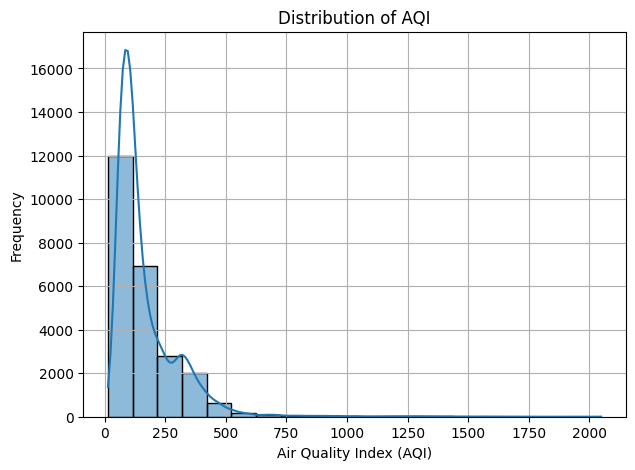

In [16]:
plt.figure(figsize=(7, 5))
sns.histplot(df['AQI'], bins=20, kde=True)
plt.xlabel("Air Quality Index (AQI)")
plt.ylabel("Frequency")
plt.title("Distribution of AQI")
plt.grid(True)
plt.show()

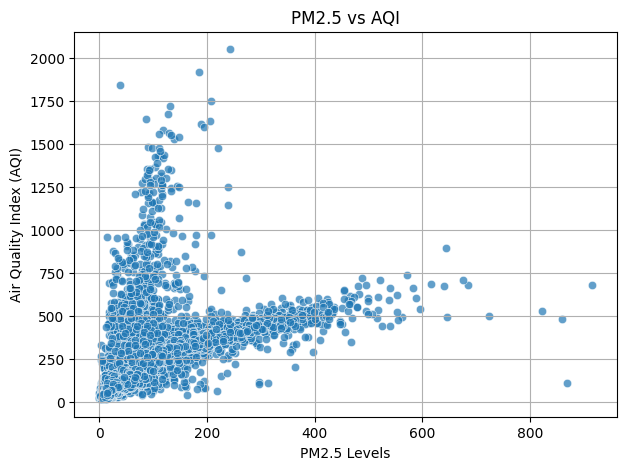

In [17]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=df['PM2.5'], y=df['AQI'], alpha=0.7)
plt.xlabel("PM2.5 Levels")
plt.ylabel("Air Quality Index (AQI)")
plt.title("PM2.5 vs AQI")
plt.grid(True)
plt.show()

### Week 2

NameError: name 'tight_layout' is not defined

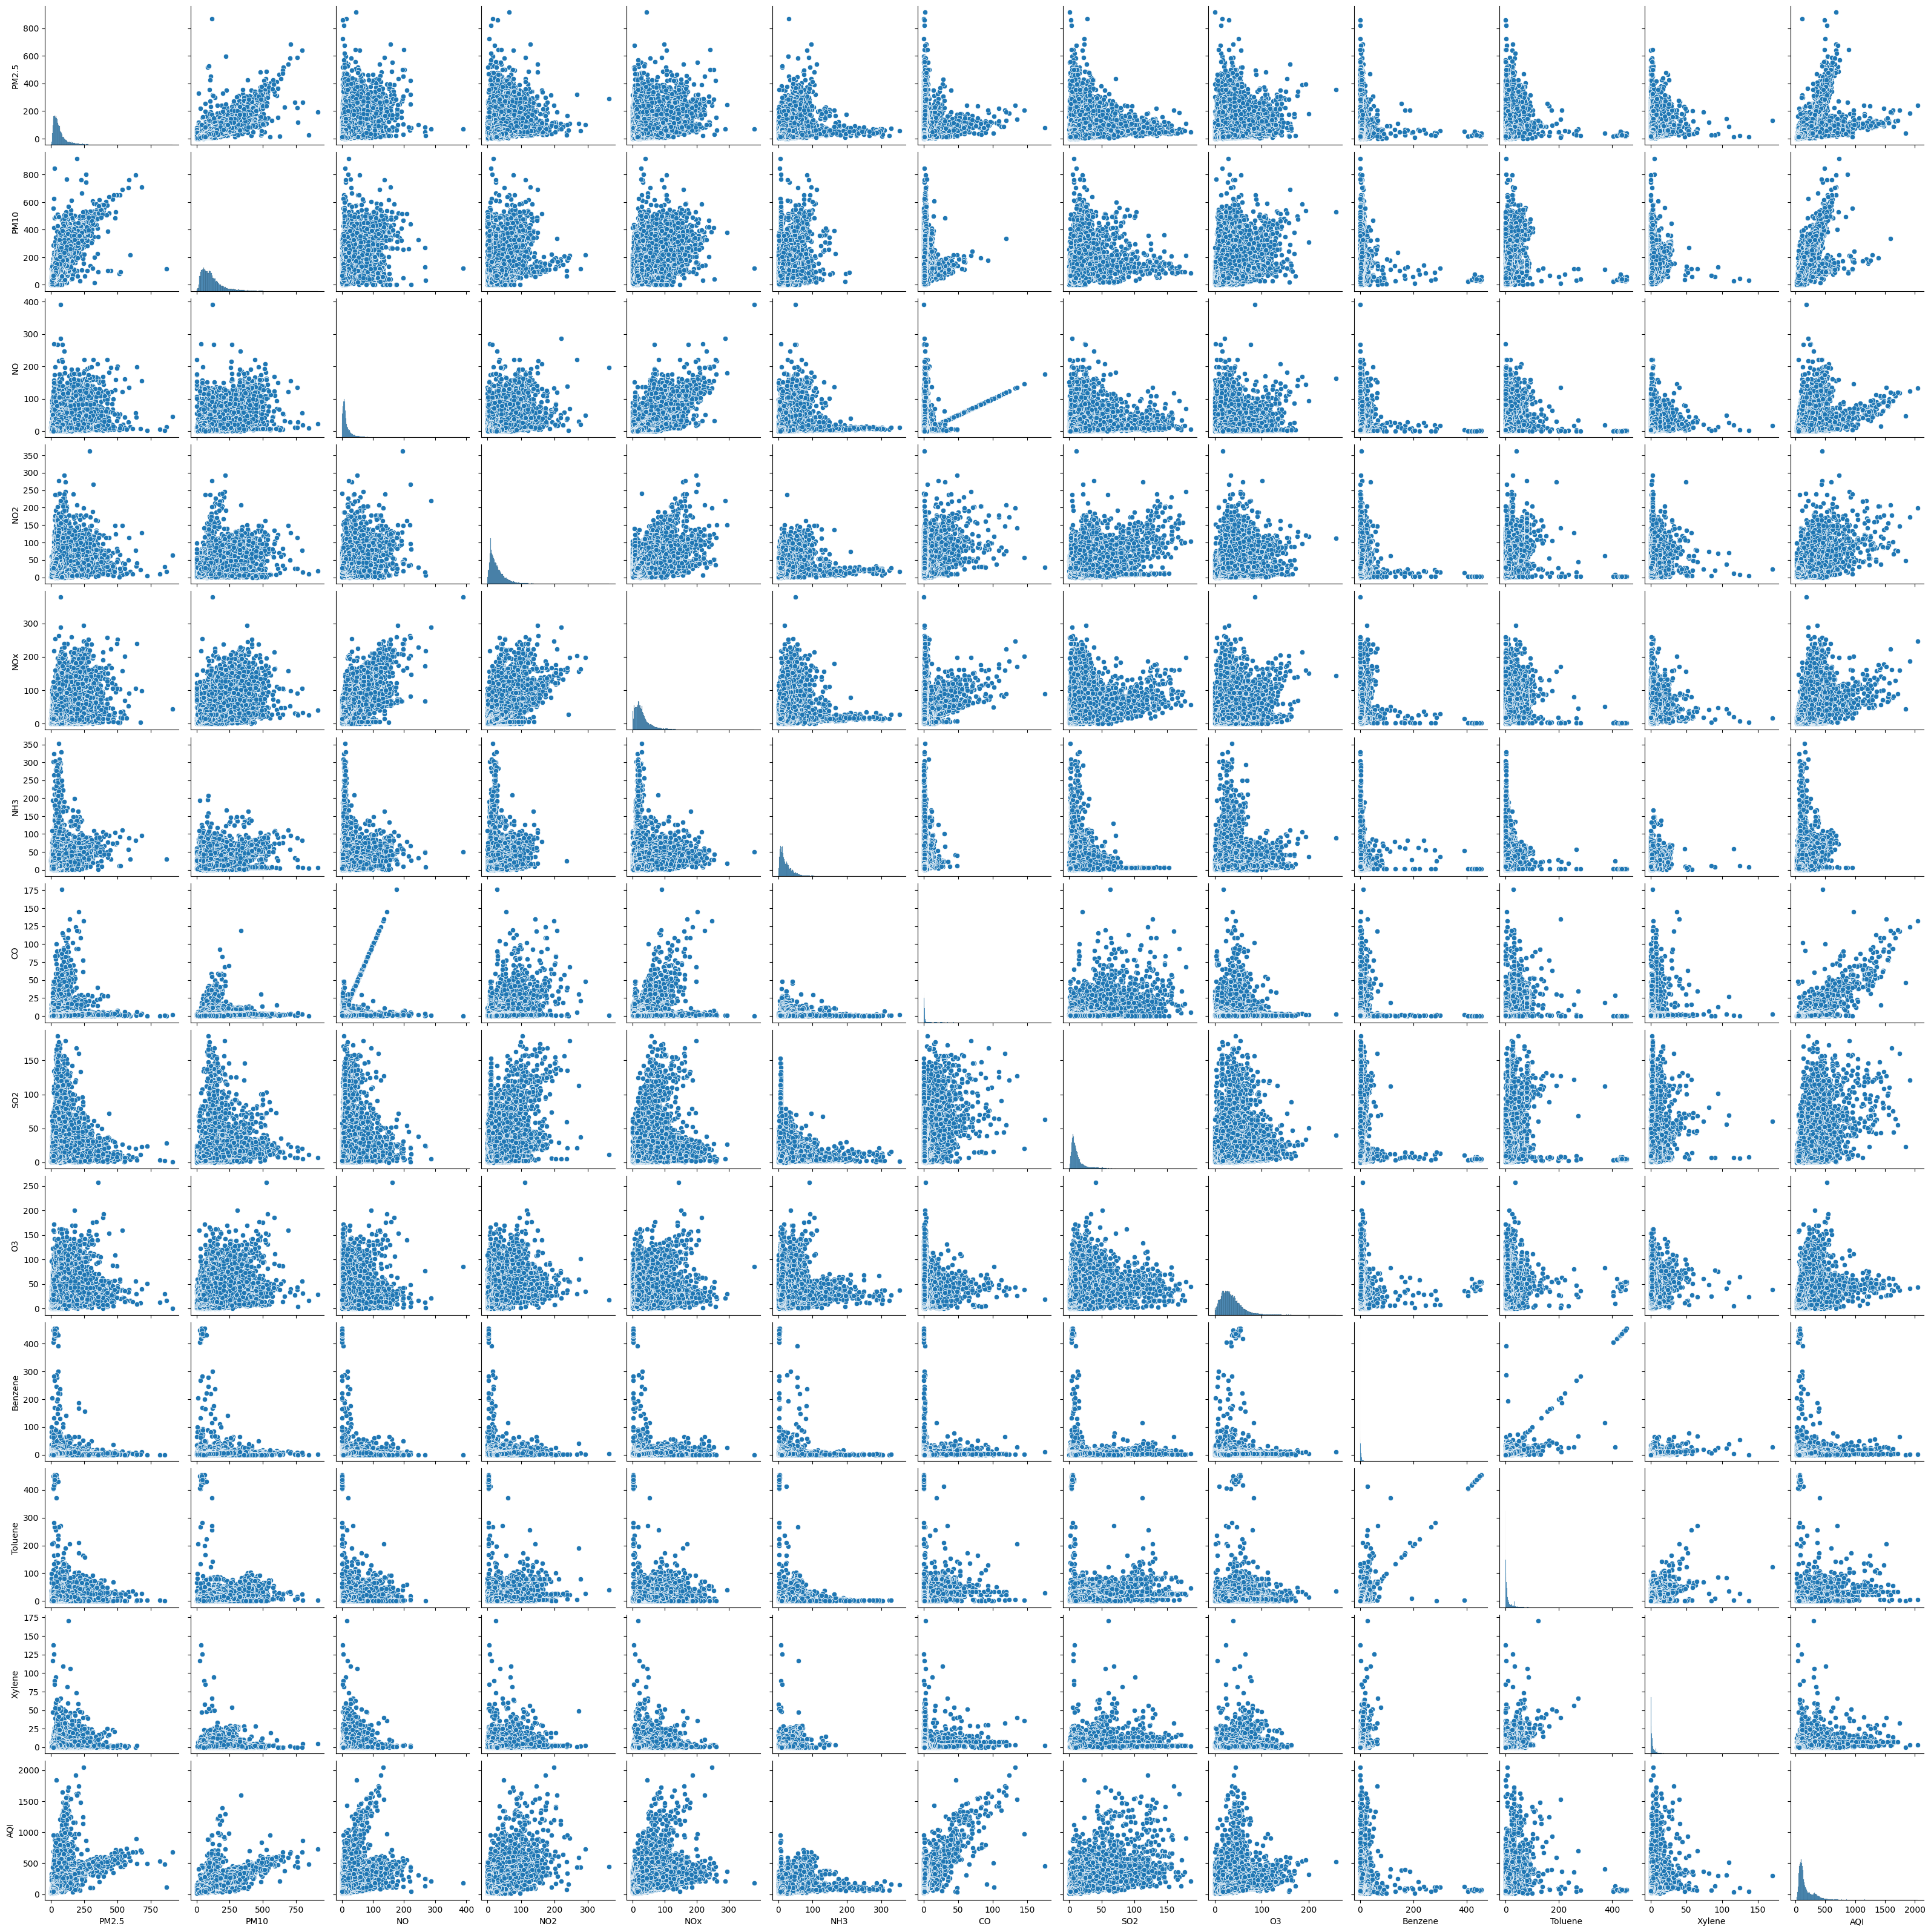

In [18]:
sns.pairplot(df,height=2.5)
plt=tight_layout()

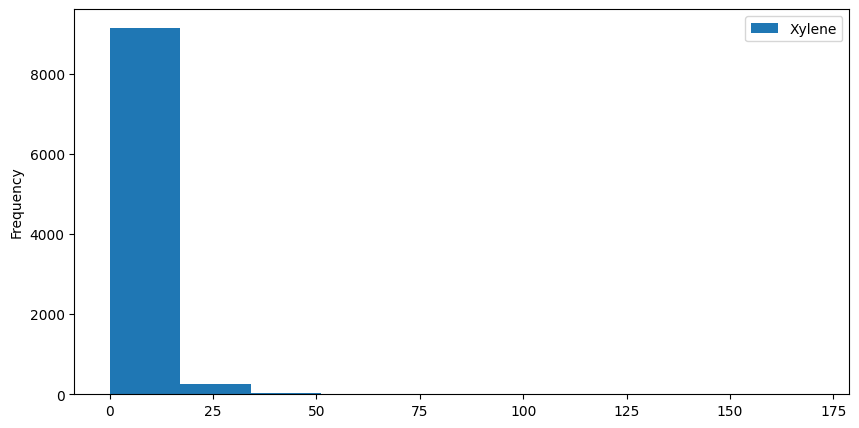

In [19]:
df['Xylene'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

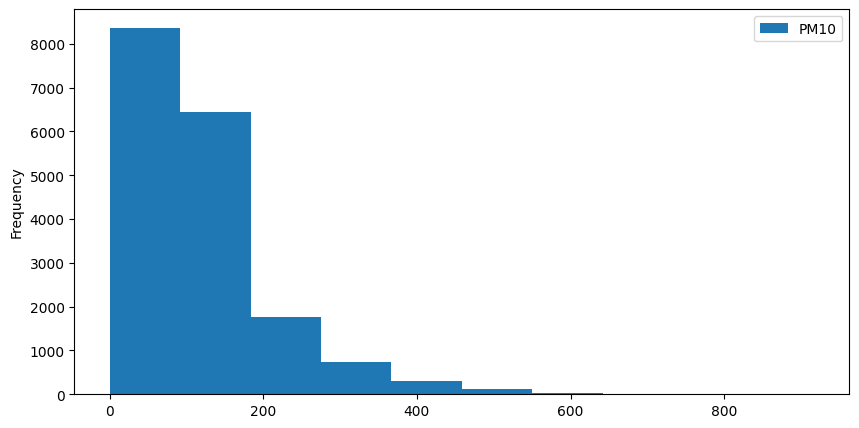

In [20]:
df['PM10'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

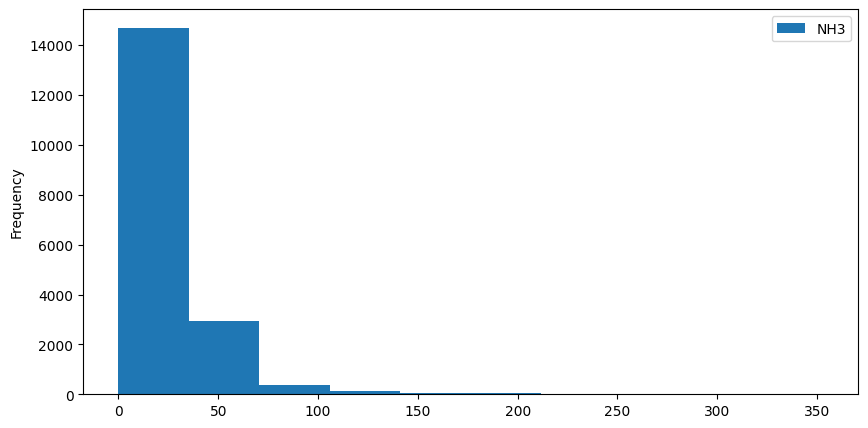

In [21]:
df['NH3'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

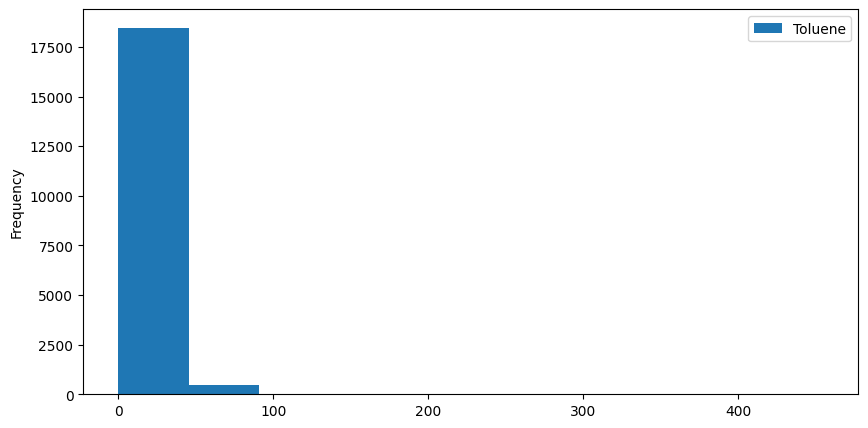

In [22]:
df['Toluene'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

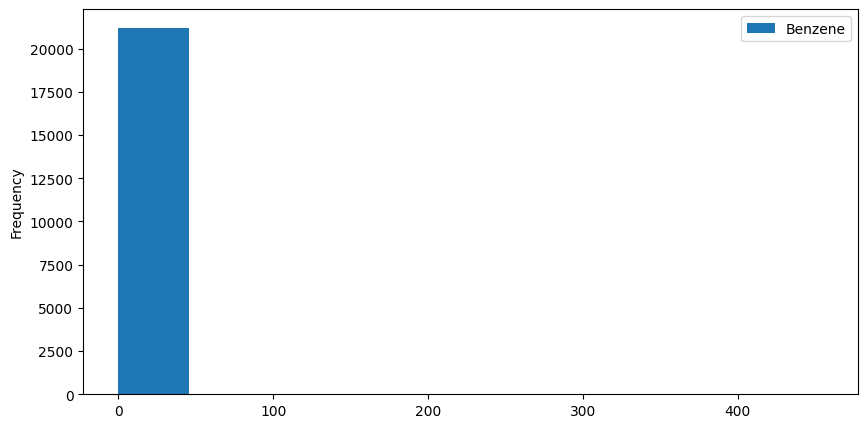

In [23]:
df['Benzene'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

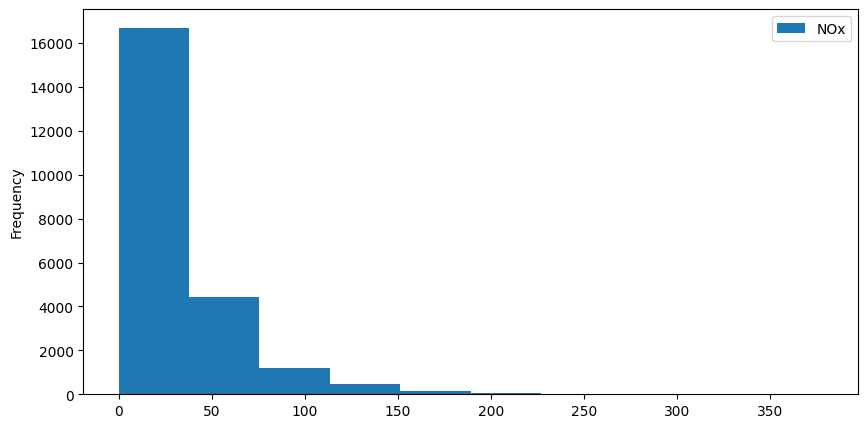

In [24]:
df['NOx'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

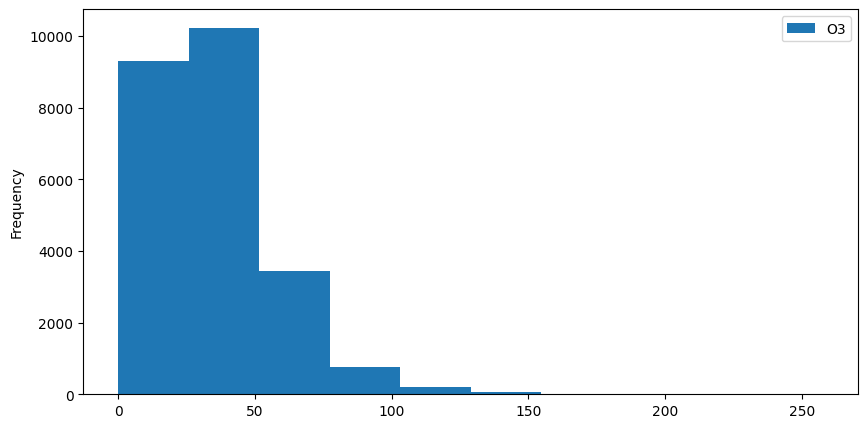

In [25]:
df['O3'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

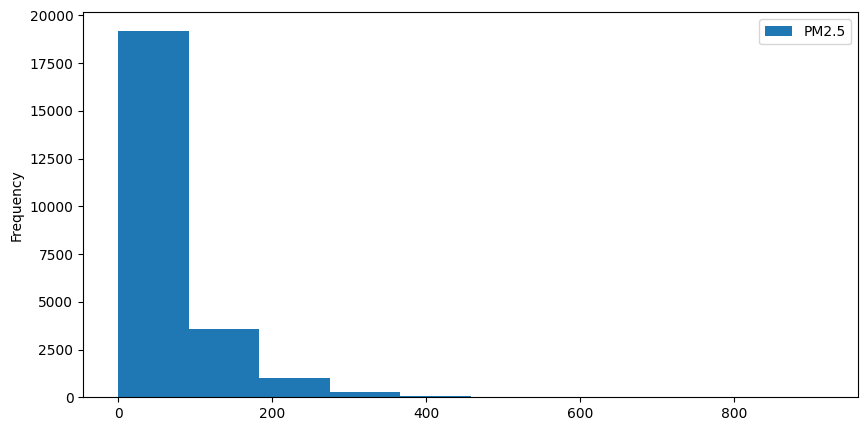

In [26]:
df['PM2.5'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

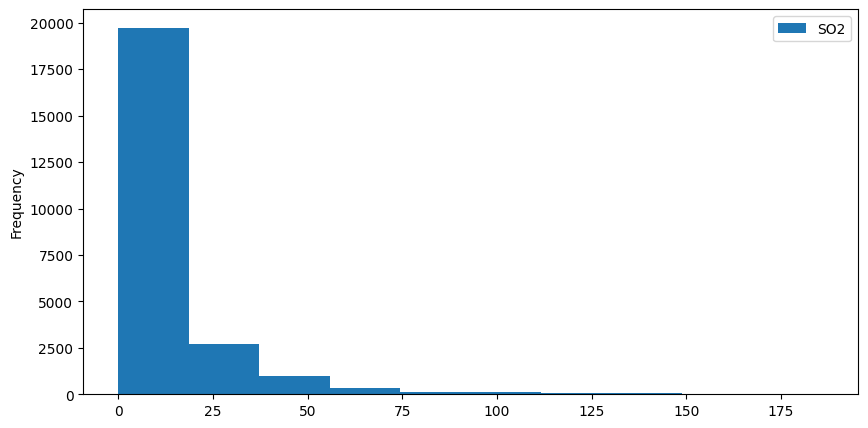

In [27]:
df['SO2'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

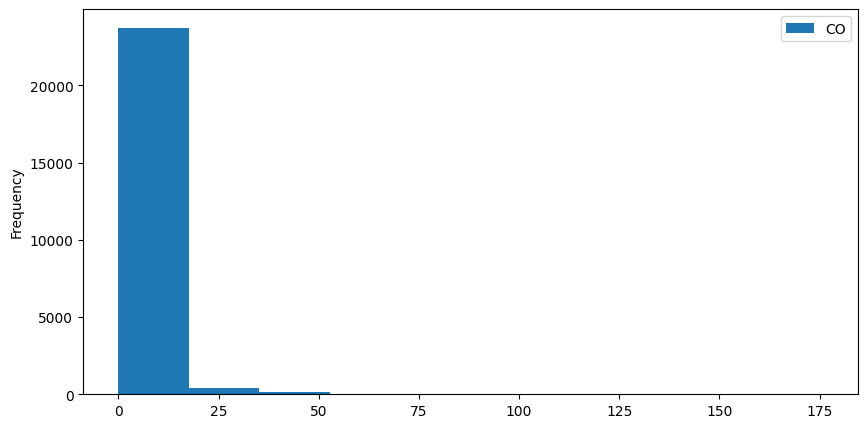

In [28]:
df['CO'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

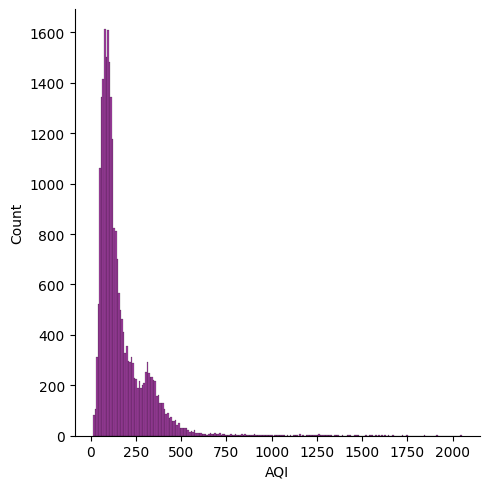

In [29]:
sns.displot(df, x='AQI', color='purple')
plt.show()

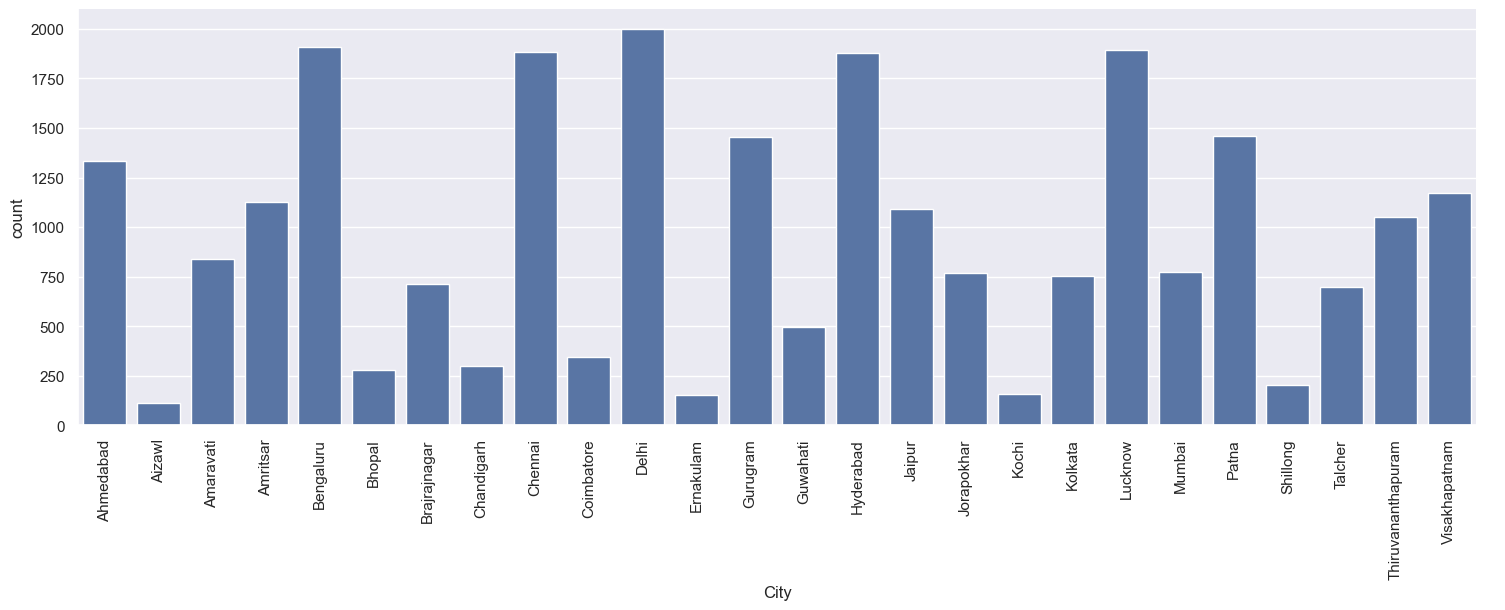

In [30]:
sns.set_theme(style="darkgrid")
graph = sns.catplot(x="City", kind='count', data=df, height=5, aspect=3)
graph.set_xticklabels(rotation=90)

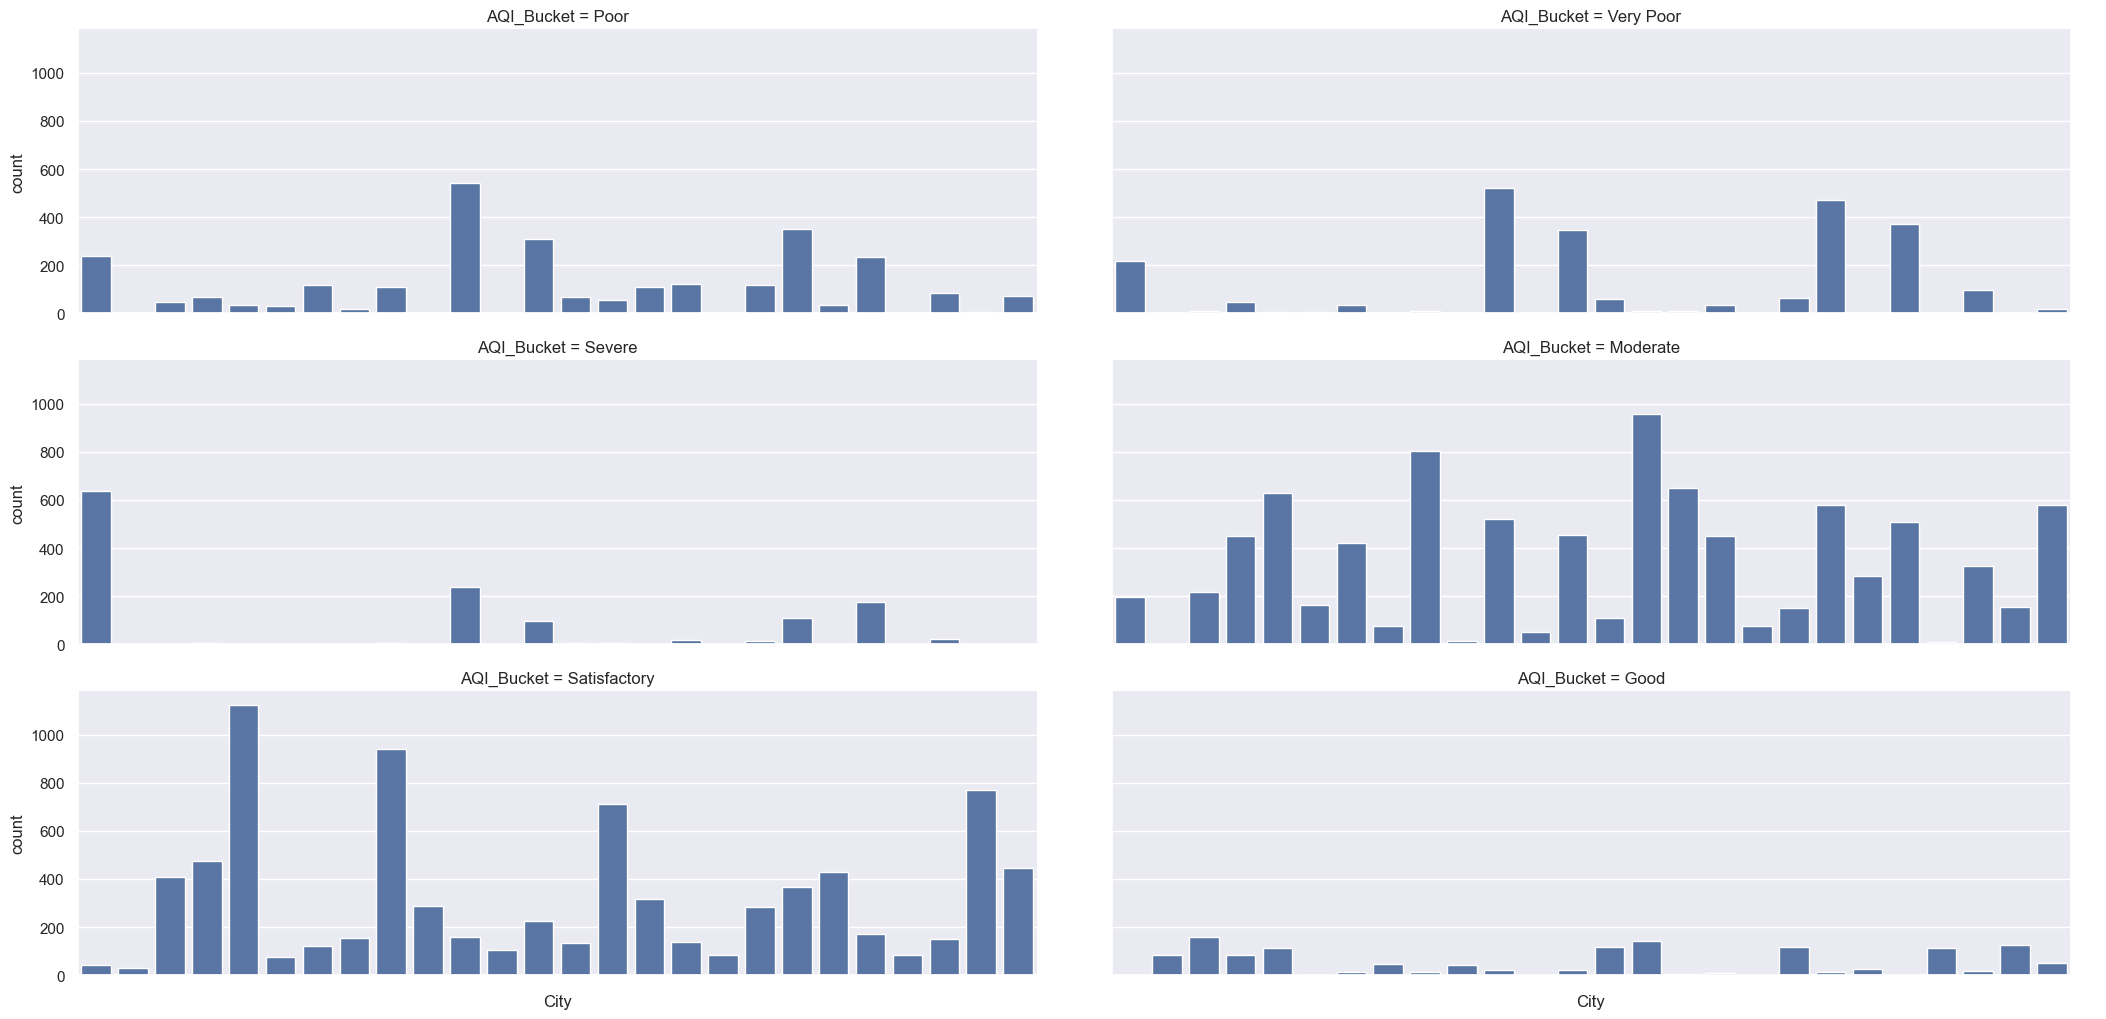

In [31]:
sns.set_theme(style="darkgrid")
graph = sns.catplot(x="City", kind='count', data=df, col="AQI_Bucket", col_wrap=2, 
                    height=3.5, aspect=3)
graph.set_xticklabels(rotation=90)

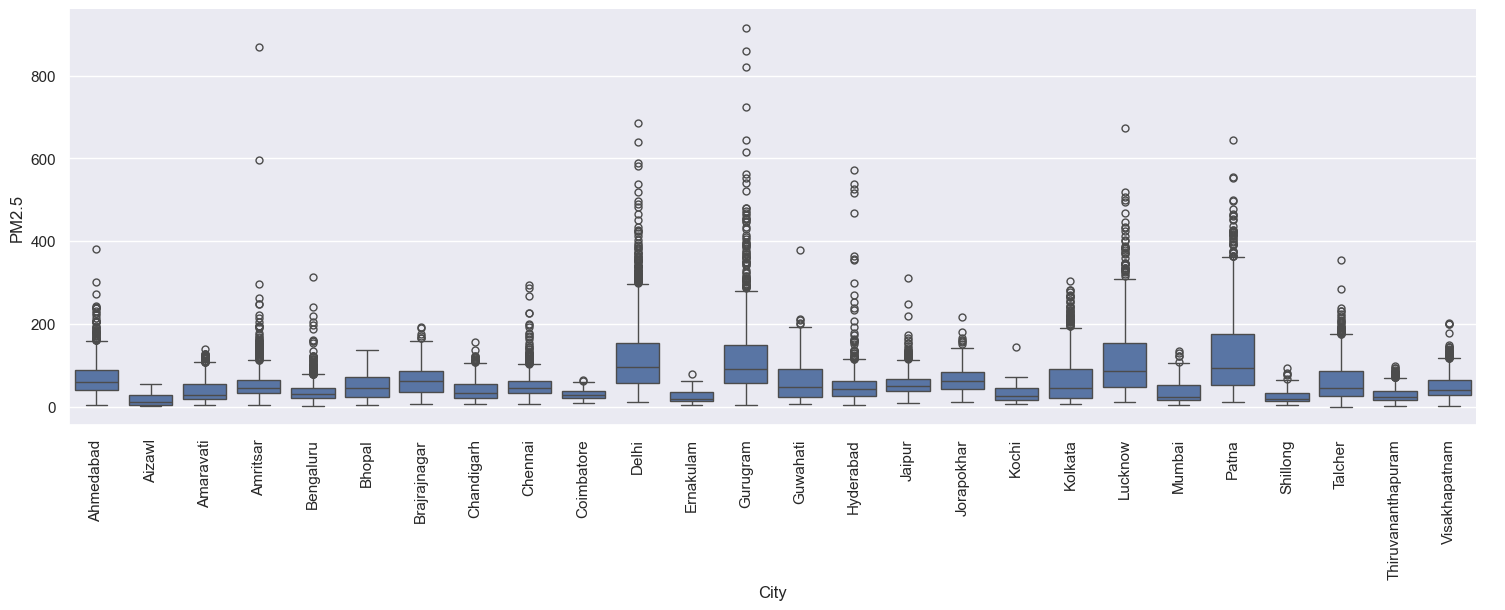

In [32]:
graph1 = sns.catplot(x='City', y='PM2.5', kind='box', data=df, height=5, aspect=3)
graph1.set_xticklabels(rotation=90)

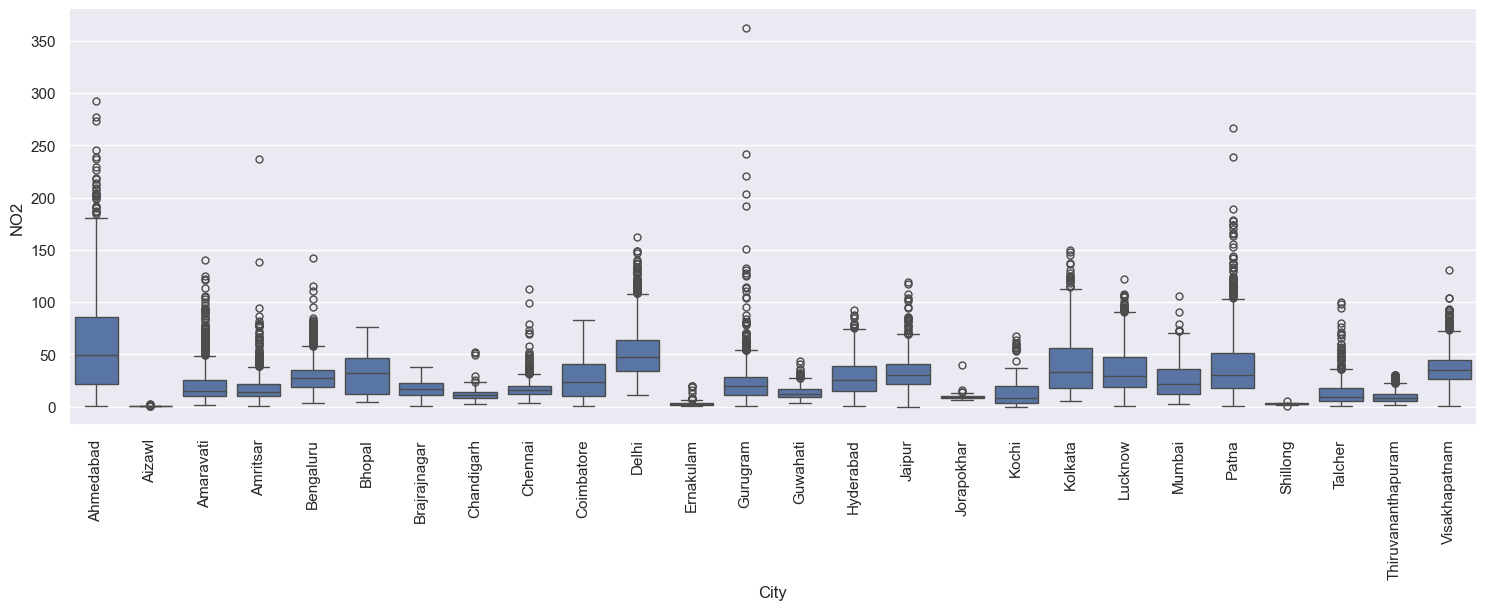

In [33]:
graph2 = sns.catplot(x='City', y='NO2', kind='box', data=df, height=5, aspect=3)
graph2.set_xticklabels(rotation=90)

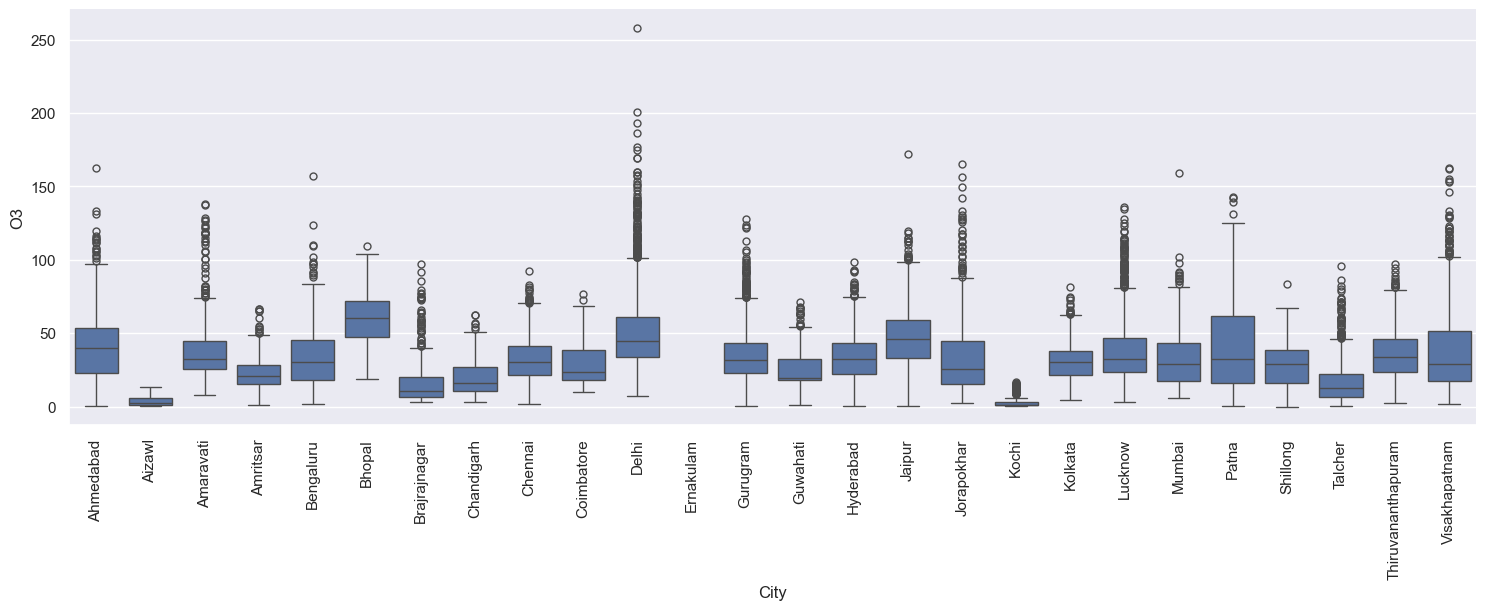

In [34]:
graph3 = sns.catplot(x='City', y='O3', kind='box', data=df, height=5, aspect=3)
graph3.set_xticklabels(rotation=90)

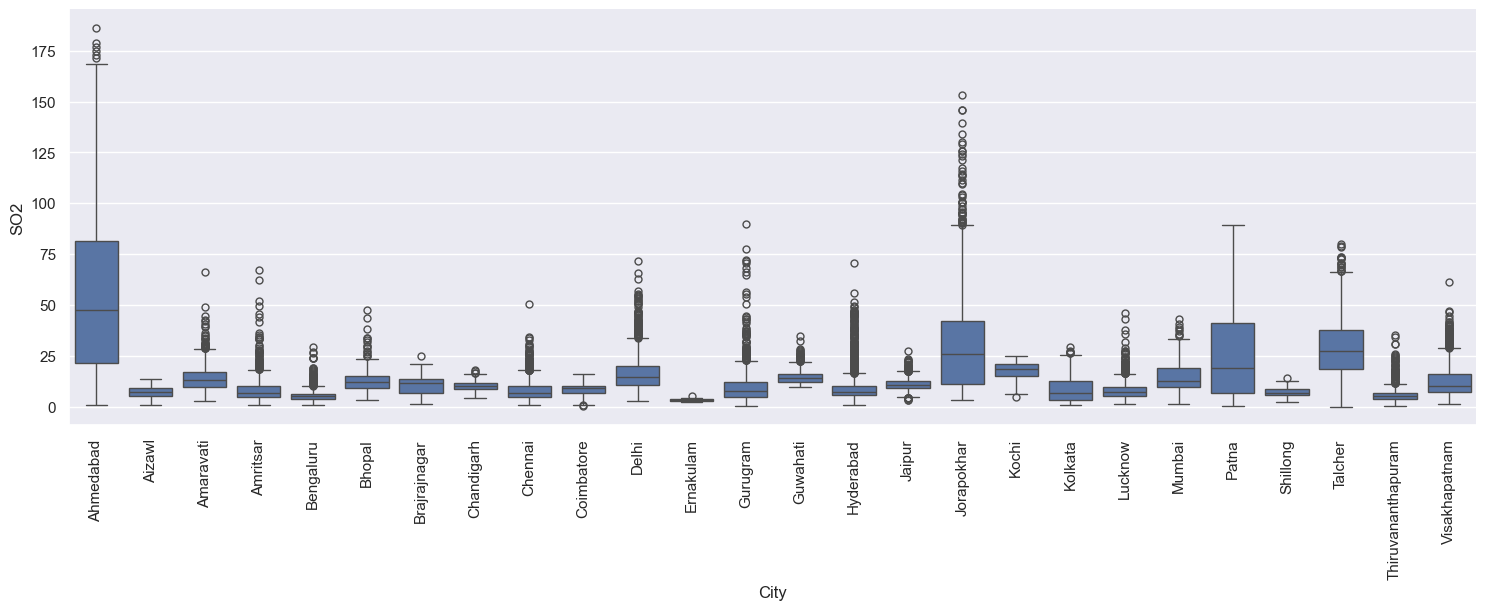

In [35]:
graph4 = sns.catplot(x='City', y='SO2', kind='box', data=df, height=5, aspect=3)
graph4.set_xticklabels(rotation=90)

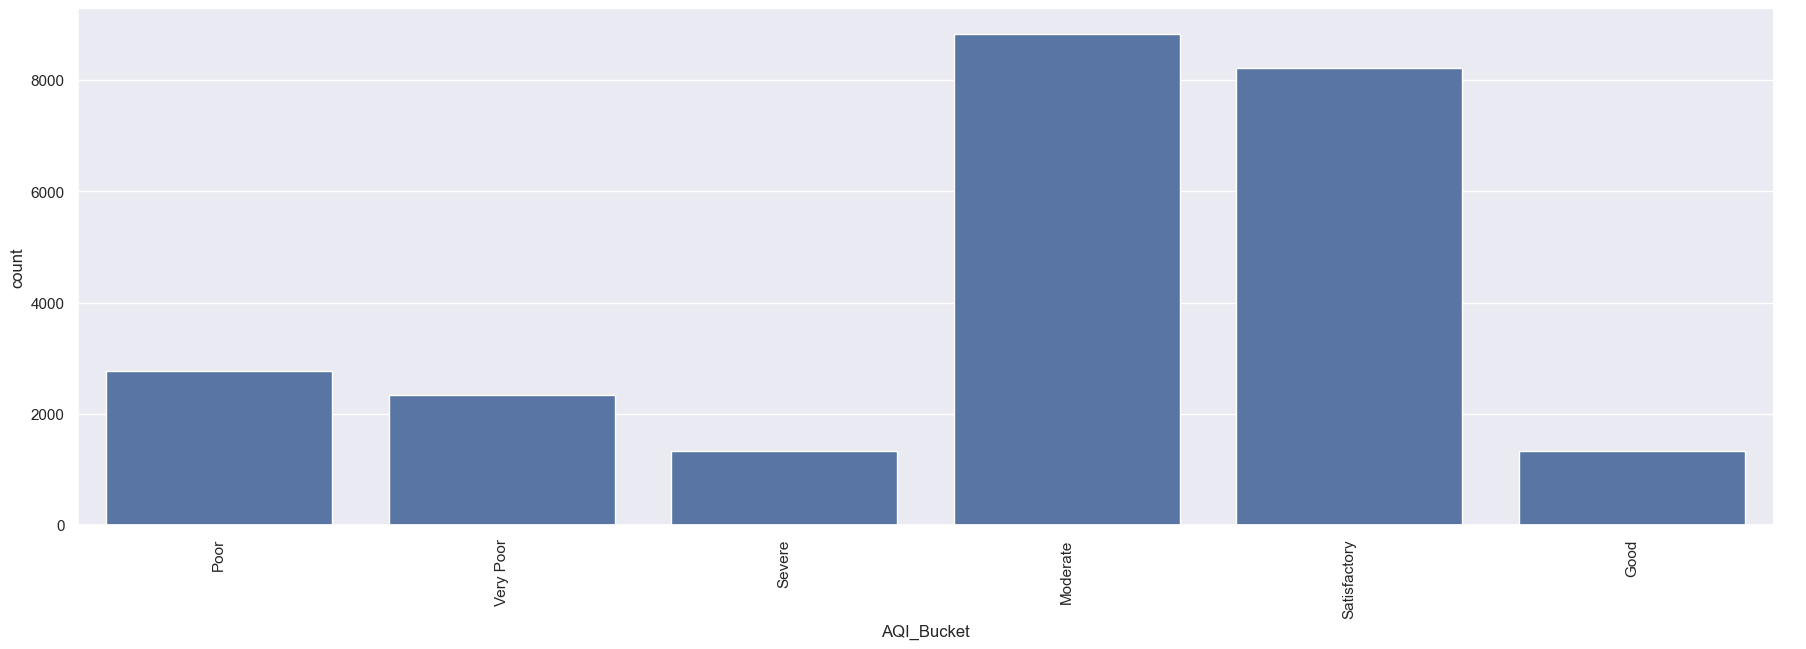

In [36]:
graph5 = sns.catplot(x='AQI_Bucket', data=df, kind='count', height=6, aspect=3)
graph5.set_xticklabels(rotation=90)

In [37]:
df.isnull().sum().sort_values(ascending=False)

Xylene        15372
PM10           7086
NH3            6536
Toluene        5826
Benzene        3535
NOx            1857
O3              807
PM2.5           678
SO2             605
CO              445
NO2             391
NO              387
Date              0
City              0
AQI               0
AQI_Bucket        0
dtype: int64

In [38]:
df.describe().loc['mean']

PM2.5       67.476613
PM10       118.454435
NO          17.622421
NO2         28.978391
NOx         32.289012
NH3         23.848366
CO           2.345267
SO2         14.362933
O3          34.912885
Benzene      3.458668
Toluene      9.525714
Xylene       3.588683
AQI        166.463581
Name: mean, dtype: float64

In [39]:
df.isnull().sum()

City              0
Date              0
PM2.5           678
PM10           7086
NO              387
NO2             391
NOx            1857
NH3            6536
CO              445
SO2             605
O3              807
Benzene        3535
Toluene        5826
Xylene        15372
AQI               0
AQI_Bucket        0
dtype: int64

In [40]:
df = df.drop(['AQI_Bucket'], axis=1)
df.head()

City        Date   PM2.5  PM10     NO    NO2    NOx  NH3     CO  \
28  Ahmedabad  29-01-2015   83.13   NaN   6.93  28.71  33.72  NaN   6.93   
29  Ahmedabad  30-01-2015   79.84   NaN  13.85  28.68  41.08  NaN  13.85   
30  Ahmedabad  31-01-2015   94.52   NaN  24.39  32.66  52.61  NaN  24.39   
31  Ahmedabad  01-02-2015  135.99   NaN  43.48  42.08  84.57  NaN  43.48   
32  Ahmedabad  02-02-2015  178.33   NaN  54.56  35.31  72.80  NaN  54.56   

      SO2      O3  Benzene  Toluene  Xylene    AQI  
28  49.52   59.76     0.02     0.00    3.14  209.0  
29  48.49   97.07     0.04     0.00    4.81  328.0  
30  67.39  111.33     0.24     0.01    7.67  514.0  
31  75.23  102.70     0.40     0.04   25.87  782.0  
32  55.04  107.38     0.46     0.06   35.61  914.0

<Axes: >

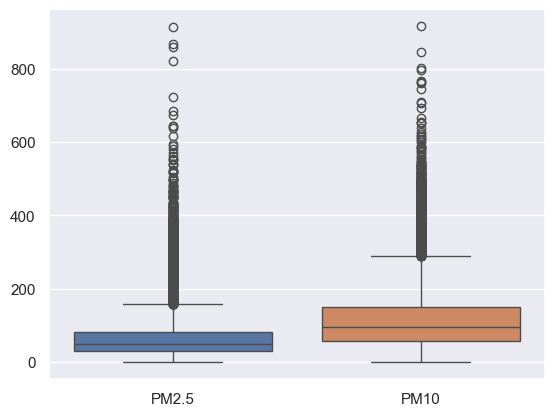

In [41]:
sns.boxplot(data=df[['PM2.5', 'PM10']])

<Axes: >

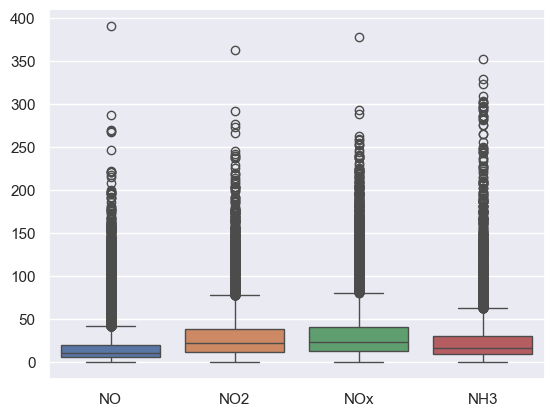

In [42]:
sns.boxplot(data=df[['NO', 'NO2', 'NOx', 'NH3']])

<Axes: >

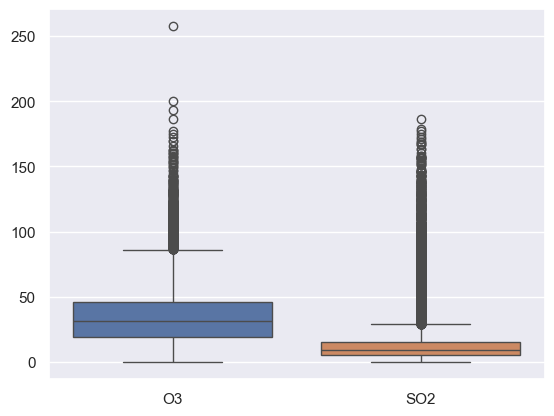

In [43]:
sns.boxplot(data=df[['O3', 'SO2']])

In [44]:
def replace_outliers(df):
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lb = Q1 - 1.5 * IQR
        ub = Q3 + 1.5 * IQR
        df[column] = df[column].apply(
            lambda x: Q1 if x < lb else (Q3 if x > ub else x)
        )
    return df
df = replace_outliers(df)
df.describe().T

count        mean        std    min      25%      50%         75%  \
PM2.5    24172.0   55.260713  32.910786   0.04  29.0000   48.785   80.921250   
PM10     17764.0  105.338640  60.235533   0.03  56.7775   96.180  150.180625   
NO       24463.0   12.517884   8.955014   0.03   5.6600    9.910   20.030000   
NO2      24459.0   25.972275  17.006150   0.01  11.9400   22.100   38.240000   
NOx      22993.0   26.756914  17.712288   0.00  13.1100   23.680   40.170000   
NH3      18314.0   20.013266  13.893247   0.01   8.9600   16.310   30.360000   
CO       24405.0    1.004899   0.576547   0.00   0.5900    0.930    1.480000   
SO2      24245.0   10.300662   5.819469   0.01   5.7300    9.220   15.140000   
O3       24043.0   33.274368  18.033165   0.01  19.2500   31.250   46.080000   
Benzene  21315.0    1.859195   1.862739   0.00   0.2300    1.290    3.340000   
Toluene  19024.0    5.495570   5.446783   0.00   1.0275    3.575   10.180000   
Xylene    9478.0    2.259553   2.287116   0.00   0.3900    1.420    4.120000   
AQI      24850.0  146.932032  87.421731  13.00  81.0000  118.000  208.000000   

            max  
PM2.5    158.80  
PM10     289.95  
NO        41.58  
NO2       77.68  
NOx       80.72  
NH3       62.45  
CO         2.81  
SO2       29.22  
O3        86.29  
Benzene    8.00  
Toluene   23.90  
Xylene     9.71  
AQI      398.00

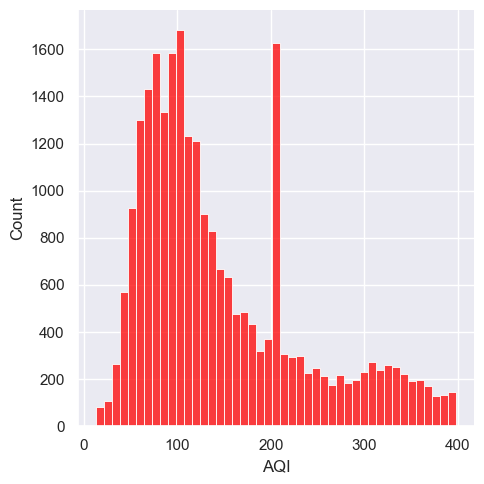

In [45]:
sns.displot(df, x='AQI', color='red')
plt.show()

In [47]:
df1 = df.drop(columns=['City'])

In [49]:
print(df1.dtypes)

Date        object
PM2.5      float64
PM10       float64
NO         float64
NO2        float64
NOx        float64
NH3        float64
CO         float64
SO2        float64
O3         float64
Benzene    float64
Toluene    float64
Xylene     float64
AQI        float64
dtype: object


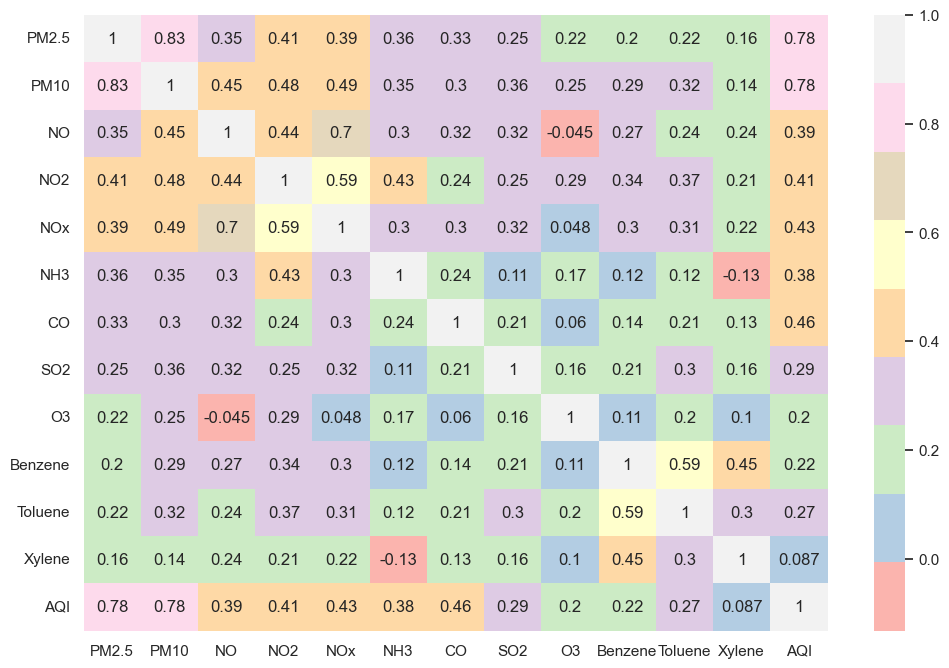

In [50]:
plt.figure(figsize=(12, 8))
sns.heatmap(df1.select_dtypes(include=['number']).corr(), annot=True, cmap='Pastel1')
plt.show()